<a href="https://colab.research.google.com/github/GO0108/Projeto-FMF/blob/GO0108-model-1/PROJETO_FMF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive com datasets: https://drive.google.com/drive/folders/1mnipUTsVHkwxGxmUqxDTdXuhbiwpiDq1?usp=sharing


Inspirado em: https://towardsdatascience.com/a-beginners-guide-to-text-classification-with-scikit-learn-632357e16f3a

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Separando datasets a serem usados





In [2]:
# olha o pandas ai gente, importando bibliotecas
import pandas as pd

df_review = pd.read_csv('/content/drive/MyDrive/PAD/Datasets/df_review.csv')
df_review.head()

,Unnamed: 0,review,sentiment
0,0,Nunca esqueci esse filme. Todos esses anos e p...,positive
1,1,Deixe-me começar dizendo que gostei de The Lon...,positive
2,2,"Paris, JE T'AIME é uma maravilhosa homenagem c...",positive
3,3,"Este é, sem dúvida, um dos meus episódios favo...",positive
4,4,Este filme se propôs a ser melhor do que o fil...,positive


In [5]:
df_review = df_review.drop('Unnamed: 0', axis=1)
df_review.columns

Index(['review', 'sentiment'], dtype='object')

In [6]:
df_positive = df_review[df_review['sentiment']=='positive'][:9000]
df_negative = df_review[df_review['sentiment']=='negative'][:1000]

df_review_imb = pd.concat([df_positive, df_negative])

# Manipulando os dados

In [7]:
# Como existem mais positivos que negativos;
from imblearn.under_sampling import  RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
df_review_bal, df_review_bal['sentiment']=rus.fit_resample(df_review_imb[['review']],
                                                           df_review_imb['sentiment'])

In [8]:
length_negative = len(df_review[df_review['sentiment']=='negative'])
df_review_positive = df_review[df_review['sentiment']=='positive'].sample(n=length_negative)
df_review_non_positive = df_review[~(df_review['sentiment']=='positive')]

df_review_bal = pd.concat([
    df_review_positive, df_review_non_positive
])
df_review_bal.reset_index(drop=True, inplace=True)
df_review_bal['sentiment'].value_counts()

positive    5000
negative    5000
Name: sentiment, dtype: int64

#Preparando Dados - Treino e Teste

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_review_bal, test_size=0.33, random_state=42)

In [10]:
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.pt.stop_words import STOP_WORDS as pt_stop

tfidf = TfidfVectorizer(stop_words=list(pt_stop))  # MUDANÇA DE LÍNGUA
train_x_vector = tfidf.fit_transform(train_x)
train_x_vector

<6700x51894 sparse matrix of type '<class 'numpy.float64'>'
	with 593405 stored elements in Compressed Sparse Row format>

In [20]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,007,00schneider,01,0126,0148,02,03,04,...,único,únicos,úrsula,úteis,útero,útil,über,übermensch,ünfaithful,četvorka
8371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
test_x_vector = tfidf.transform(test_x)

# Modelagem e Resultados do Modelo

In [22]:
# Regressao Logistica
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

LogisticRegression()

In [23]:
# resultados
from sklearn.metrics import classification_report

print(classification_report(test_y, 
                            log_reg.predict(test_x_vector),
                            labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.86      0.89      0.87      1678
    negative       0.88      0.85      0.87      1622

    accuracy                           0.87      3300
   macro avg       0.87      0.87      0.87      3300
weighted avg       0.87      0.87      0.87      3300



[Text(0.5, 1.0, 'Matriz de Confusão')]

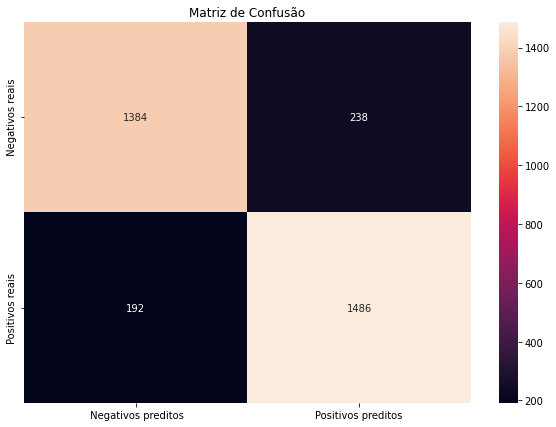

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt


linhas = [' Negativos reais', 'Positivos reais']
colunas = [' Negativos preditos', 'Positivos preditos']

conf_mat = confusion_matrix(test_y,log_reg.predict(test_x_vector))



df_cm = pd.DataFrame(conf_mat, index =linhas, columns = colunas)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g').set(title="Matriz de Confusão", )

In [29]:
print(log_reg.predict(tfidf.transform(['Deus do céu que filme ruim'])))
print(log_reg.predict(tfidf.transform(['O melhor que já vi na vida!!!! Chorei e fiquei emocionado'])))
print(log_reg.predict(tfidf.transform(['Preferia estar em casa dormindo'])))
print(log_reg.predict(tfidf.transform(['Preferia ver o filme do Pelé'])))   # aparentemente o modelo gosta do Pelé

['negative']
['positive']
['negative']
['positive']



> Testando o com célebres frases de Isabela Boscov:



In [28]:

print(log_reg.predict(tfidf.transform(['Inovador e revolucionário? Não, mas durante aquela meia hora cria ali para você um lugar tão aconchegante, tão reconfortante'])))
print(log_reg.predict(tfidf.transform(['é de uma imbecilidade atroz'])))
print(log_reg.predict(tfidf.transform(['Quer jogar dinheiro? Não jogue fora! Doe para os Médicos Sem Fronteiras. Mas não faça um filme como esse'])))
print(log_reg.predict(tfidf.transform(['o melhor é o final (porque acaba)'])))
print(log_reg.predict(tfidf.transform(['Mas, do meu ponto de vista pessoal, é uma obra-prima'])))


['positive']
['negative']
['negative']
['negative']
['positive']
